<a href="https://colab.research.google.com/github/mobukerk/Data_Journey/blob/main/06_preprocessamento_titanic_31out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Valores nulos por coluna:
survived         0
pclass 

/tmp/ipython-input-2908541698.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(), inplace=True)
/tmp/ipython-input-2908541698.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,age,idade_faixa
0,22.000000,adulto
1,38.000000,adulto
2,26.000000,adulto
3,35.000000,adulto
4,35.000000,adulto
5,29.699118,adulto
6,54.000000,meia-idade
7,2.000000,jovem
8,27.000000,adulto
9,14.000000,jovem


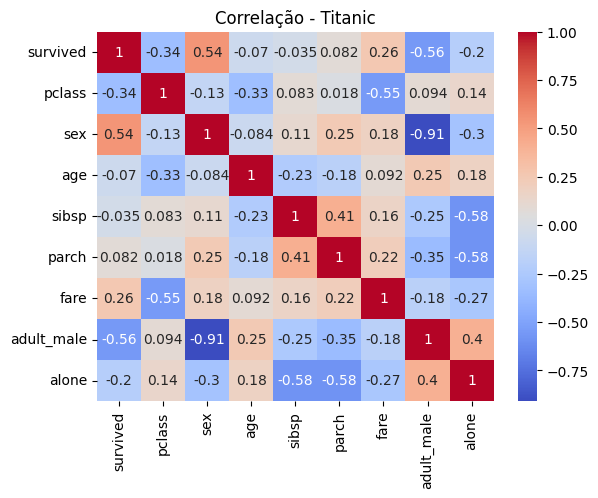

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dataset com valores faltantes
df = sns.load_dataset("titanic")
display(df.head())
print("\nInformações gerais:")
print(df.info())

# 1️⃣ Tratar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Preencher média nas numéricas e moda nas categóricas
df["age"].fillna(df["age"].mean(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# 2️⃣ Criar colunas novas (feature engineering)
df["idade_faixa"] = pd.cut(df["age"], bins=[0,18,40,60,100], labels=["jovem","adulto","meia-idade","idoso"])
display(df[["age","idade_faixa"]].head(10))

# 3️⃣ Converter categorias em números
df["sex"] = df["sex"].map({"male":0,"female":1})

# 4️⃣ Verificar correlação numérica
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlação - Titanic")
plt.show()
